In [2]:
using Plots

In [3]:
#import Pkg
#Pkg.add("RCall")
using RCall

In [4]:
#call R to perform some computation
R"sum(c(1,2,3,4,5,6,7,8,-9,100))"

RObject{RealSxp}
[1] 127


In [6]:
R"rnorm(10)"

RObject{RealSxp}
 [1]  0.3734395  1.1175959  0.3818067  1.2621841  0.3883138 -1.3105999
 [7] -1.1116290 -0.7026082 -1.0583132 -1.4338364


In [7]:
R"mean(rnorm(100))"

RObject{RealSxp}
[1] -0.06897292


In [8]:
#use R to perform a t-test
R"t.test(rnorm(10,0,2),rnorm(10,1,2))"

RObject{VecSxp}

	Welch Two Sample t-test

data:  rnorm(10, 0, 2) and rnorm(10, 1, 2)
t = 0.61145, df = 17.991, p-value = 0.5486
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.341050  2.442037
sample estimates:
  mean of x   mean of y 
 0.53249760 -0.01799573 



In [9]:
#use R to perform a t-test using data from Julia
using Random, Distributions
d1 = Normal(0,2)
d2 = Normal(1,2)
r1 = rand(d1,10)
r2 = rand(d2,10)
R"t.test($r1,$r2)"

RObject{VecSxp}

	Welch Two Sample t-test

data:  `#JL`$r1 and `#JL`$r2
t = -1.0901, df = 13.211, p-value = 0.2951
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.6811127  0.8808352
sample estimates:
mean of x mean of y 
0.1508488 1.0509875 



In [10]:
#pass a function
f1(x,y) = x/(y+5)
R"$f1(2,5)"

RObject{RealSxp}
[1] 0.2


In [29]:
#use multiline statements in R, and then extract a variable from R's environment to copy it into Julia
R"""
r1b = $r1 - 10
xx = t.test(r1b,$r2)
"""
xx = rcopy(R"xx")
println(xx)
println(xx[:p_value])
println(xx[Symbol("p_value")])

OrderedCollections.OrderedDict{Symbol, Any}(:statistic => -9.370442843268794, :parameter => 16.81255996015915, :p_value => 4.385708308211815e-8, :conf_int => [-13.00208400190803, -8.219782721570542], :estimate => [-9.557188278755484, 1.053745082983802], :null_value => 0.0, :stderr => 1.1323833397438192, :alternative => "two.sided", :method => "Welch Two Sample t-test", :data_name => "r1b and `#JL`\$r2")
4.385708308211815e-8
4.385708308211815e-8


In [30]:
#'robject' function converts, changes, a julia 'object' to an RObject for R to use
dd1 = Dict("a"=>1,"b"=>2,"c"=>3)
println(dd1)
dd1r = robject(dd1)
println(dd1r)
R"typeof($dd1r)"

Dict("c" => 3, "b" => 2, "a" => 1)
RObject{VecSxp}
$c
[1] 3

$b
[1] 2

$a
[1] 1




RObject{StrSxp}
[1] "list"


In [11]:
#import R functions direct into Julia
@rimport base as Rbase

In [13]:
Rbase.c(1,2,3,100)

RObject{IntSxp}
[1]   1   2   3 100


In [15]:
Rbase.sum(Rbase.c(1,2,3,810))

RObject{IntSxp}
[1] 816


In [16]:
R"data(\"PlantGrowth\")"

RObject{StrSxp}
[1] "PlantGrowth"


In [17]:
rcopy(R"head(PlantGrowth)")

Row,weight,group
,Float64,Cat…
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.5,ctrl
6,4.61,ctrl


In [18]:
pg = rcopy(R"PlantGrowth")

Row,weight,group
,Float64,Cat…
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.5,ctrl
6,4.61,ctrl
7,5.17,ctrl
8,4.53,ctrl
9,5.33,ctrl


In [17]:
pg

Row,weight,group
,Float64,Cat…
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.5,ctrl
6,4.61,ctrl
7,5.17,ctrl
8,4.53,ctrl
9,5.33,ctrl


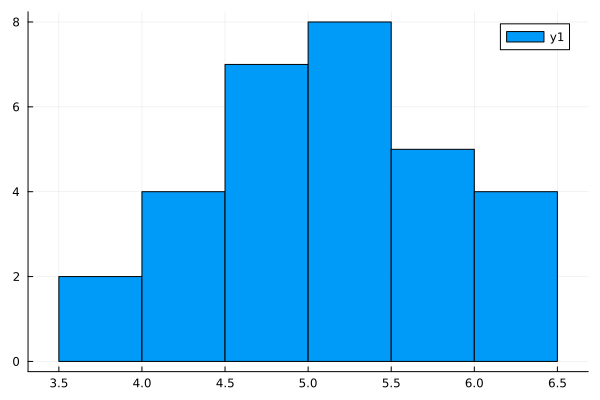

In [42]:
plot( pg[:,:weight] , seriestype=:histogram)